In [1]:
# 03_cars_linear_regression
# X : 'speed' (속도)  , Y : 'dist' (제동거리)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

# 데이터 읽어보기
xy = np.loadtxt('data-01-cars.csv',delimiter=',',skiprows=1,unpack=True)
x_train = xy[0]
y_train = xy[1]
xy

array([[  4.,   4.,   7.,   7.,   8.,   9.,  10.,  10.,  10.,  11.,  11.,
         12.,  12.,  12.,  12.,  13.,  13.,  13.,  13.,  14.,  14.,  14.,
         14.,  15.,  15.,  15.,  16.,  16.,  17.,  17.,  17.,  18.,  18.,
         18.,  18.,  19.,  19.,  19.,  20.,  20.,  20.,  20.,  20.,  22.,
         23.,  24.,  24.,  24.,  24.,  25.],
       [  2.,  10.,   4.,  22.,  16.,  10.,  18.,  26.,  34.,  17.,  28.,
         14.,  20.,  24.,  28.,  26.,  34.,  34.,  46.,  26.,  36.,  60.,
         80.,  20.,  26.,  54.,  32.,  40.,  32.,  40.,  50.,  42.,  56.,
         76.,  84.,  36.,  46.,  68.,  32.,  48.,  52.,  56.,  64.,  66.,
         54.,  70.,  92.,  93., 120.,  85.]])

In [2]:
# t = 10,20,30   # packing
# type(t)
# a,b,c = t      # unpacking

In [3]:
# 변수 초기화 : weight, bias
W = tf.Variable(tf.random.normal([1]),name='weight')
b = tf.Variable(tf.random.normal([1]),name='bias')
print(W)
print(b)

<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([-0.18030666], dtype=float32)>
<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.22652863], dtype=float32)>


In [4]:
# 예측 함수(hypothesis) : H(x) = W*X + b
def hypothesis(X):
    return X*W + b

In [5]:
# 비용 함수 : (Hx - y)^2 의 평균
# tf.square()      : 제곱
# tf.reduce_mean() : 합의 평균
def cost_func():
    cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train))
    return cost

In [6]:
# 경사 하강법
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
# optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [7]:
# 학습 시작
print('***** Start Learning!!')
for step in range(10001):
    optimizer.minimize(cost_func,var_list=[W,b])
    if step % 100 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
print('***** Learning Finished!!')

***** Start Learning!!
0000 cost:[ 2746.3662 ]  W: [-0.17030665]  b: [0.23652864]
0100 cost:[ 1405.5791 ]  W: [0.7634749]  b: [1.1666383]
0200 cost:[ 711.9278 ]  W: [1.5014503]  b: [1.8872597]
0300 cost:[ 412.7359 ]  W: [2.0317748]  b: [2.3801656]
0400 cost:[ 307.80438 ]  W: [2.3737347]  b: [2.6606307]
0500 cost:[ 278.32727 ]  W: [2.5699966]  b: [2.7712994]
0600 cost:[ 271.5089 ]  W: [2.6710968]  b: [2.7657683]
0700 cost:[ 269.90894 ]  W: [2.719547]  b: [2.690255]
0800 cost:[ 269.20804 ]  W: [2.7431982]  b: [2.575383]
0900 cost:[ 268.595 ]  W: [2.7569902]  b: [2.437687]
1000 cost:[ 267.95435 ]  W: [2.7676616]  b: [2.2846847]
1100 cost:[ 267.27454 ]  W: [2.7778053]  b: [2.1193194]
1200 cost:[ 266.55594 ]  W: [2.7882767]  b: [1.942608]
1300 cost:[ 265.8 ]  W: [2.799316]  b: [1.7548761]
1400 cost:[ 265.00818 ]  W: [2.8109796]  b: [1.5562365]
1500 cost:[ 264.182 ]  W: [2.8232772]  b: [1.3467468]
1600 cost:[ 263.32297 ]  W: [2.836209]  b: [1.1264536]
1700 cost:[ 262.43286 ]  W: [2.8497717] 

In [8]:
# weight과 bias 출력
print('Weight:',W.numpy())
print('Bias:',b.numpy())

Weight: [3.9324007]
Bias: [-17.578957]


In [9]:
# 예측
print('***** Predict')
# 속도가 30과 50일 때 제동 거리를 예측해 보세요
print('speed=30 , dist=', hypothesis(30).numpy())
print('speed=50 , dist=', hypothesis(50).numpy())

# X = [10,11,12,24,25] 일때
print('speed = [10,11,12,24,25], dist=', hypothesis([10,11,12,24,25]).numpy())

***** Predict
speed=30 , dist= [100.39307]
speed=50 , dist= [179.04108]
speed = [10,11,12,24,25], dist= [21.745049 25.677452 29.609852 76.79866  80.731064]


C:\Users\kt826\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


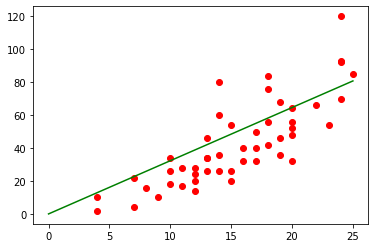

In [10]:
# 시각화 : matplotlib 사용
def prediction(X,W,b):
    return X*W + b

plt.plot(x_train,y_train,'ro')  # Red      , 원본 데이터
plt.plot((0,25),(0,prediction(25,W,b)),'g' ) # Green
# plt.plot((0,25),(prediction(0,W,b),prediction(25,W,b)),'b' ) # Blue, 예측함수